In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
cin_df = pd.read_csv('./data./Customer_info.csv')
din_df = pd.read_csv('./data./Discount_info.csv')
min_df = pd.read_csv('./data./Marketing_info.csv')
oin_df = pd.read_csv('./data./Onlinesales_info.csv')
tin_df = pd.read_csv('./data./Tax_info.csv')

In [3]:
cin_df

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [4]:
din_df

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [5]:
min_df

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [6]:
oin_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [7]:
tin_df

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


- GST : Goods and Services Tax 상품용역세

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cin_df['성별'] = le.fit_transform(cin_df['성별'])
cin_df

,고객ID,성별,고객지역,가입기간
0,USER_1358,0,Chicago,12
1,USER_0190,0,California,43
2,USER_0066,0,Chicago,33
3,USER_0345,1,California,30
4,USER_0683,0,California,49
...,...,...,...,...
1463,USER_0513,1,New York,41
1464,USER_0167,1,Chicago,48
1465,USER_0845,0,New Jersey,19
1466,USER_0504,1,New York,45


In [3]:
cin_df['고객지역'].value_counts()

고객지역
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

- 고객지역은 onehotencoding을 진행하자

In [3]:
# 두 DataFrame을 제품카테고리를 기준으로 병합
m_df = pd.merge(oin_df,tin_df, on='제품카테고리', how='left')
m_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0.18
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0.10
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0.18
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0.10
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0.10


In [6]:
# ID들 boxplot도 확인하자
m_df['고객ID'].value_counts()

고객ID
USER_0118    695
USER_0736    587
USER_0563    575
USER_1355    572
USER_0643    523
            ... 
USER_1327      1
USER_1296      1
USER_0738      1
USER_0290      1
USER_0366      1
Name: count, Length: 1468, dtype: int64

In [4]:
from matplotlib import font_manager, rc
font_path = 'C:\\Windows\\Fonts\\NanumSquareR.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

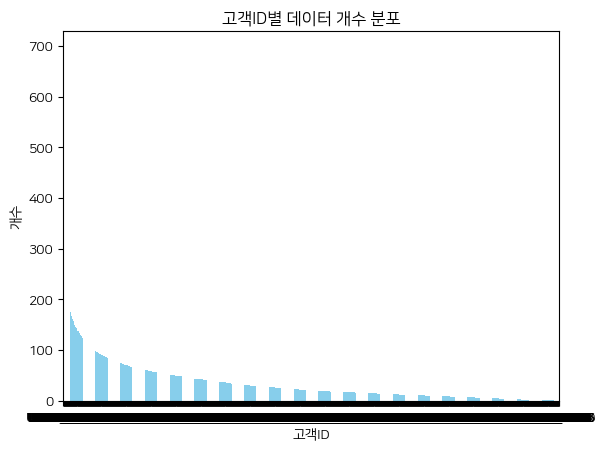

In [5]:
# '고객ID' 열의 값들의 각 개수 분포 확인
id_counts = m_df['고객ID'].value_counts()

# 막대 그래프로 시각화
id_counts.plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('고객ID')
plt.ylabel('개수')
plt.title('고객ID별 데이터 개수 분포')
plt.show()

In [5]:
m_df.describe()

,수량,평균금액,배송료,GST
count,52924.000000,52924.000000,52924.000000,52924.000000
mean,4.497638,52.237646,10.517630,0.137462
std,20.104711,64.006882,19.475613,0.045825
min,1.000000,0.390000,0.000000,0.050000
25%,1.000000,5.700000,6.000000,0.100000
50%,1.000000,16.990000,6.000000,0.180000
75%,2.000000,102.130000,6.500000,0.180000
max,900.000000,355.740000,521.360000,0.180000


- ID 별로 나뉘었을 때 나름의 그룹이 되는 것 같다.
- 이대로 나누기 보다는 조금 더 큼직한 그룹으로 하는 편이 의미가 있어 보인다.

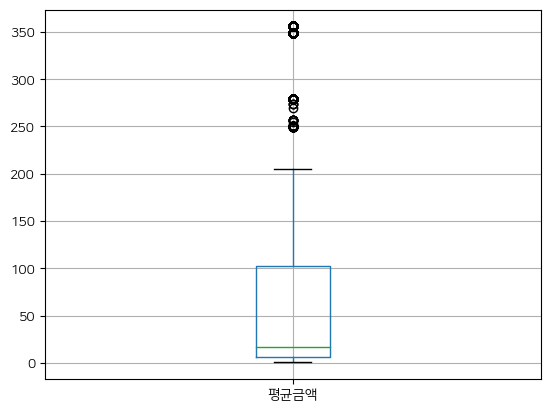

In [6]:
# '평균금액' 열의 값에 대한 boxplot 그리기
m_df.boxplot(column='평균금액')

# 그래프를 화면에 출력
plt.show()

## 결과
- 평균 금액의 boxplot 상 특이점이 일부 있고, 이는 전체 평균에서 매우 크게 차이나는 것으로 보인다.
- 그렇다고 이들을 무시하고 고객 분류를 한다면 부정적인 영향이 클 것으로 보인다.
- 이들을 vip로 묶고, 그 외의 이들을 따로 분류하는 편이 낫지 않을까?

In [4]:
# 쿠폰 상태 label encoding하기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
m_df['쿠폰상태'] = le.fit_transform(m_df['쿠폰상태'])
m_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,2,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,2,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,2,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,1,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,2,0.18
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,0,0.10
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,2,0.18
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,2,0.10
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,0,0.10


- 쿠폰코드가 필요할까? 이미 할인율은 나왔다.
- 고객 지역도 labeling을 하자. 근데 어떤걸로?
- 쿠폰상태/성별은 labeling 필수. 제품 카테고리는 필요할까? GST로 퉁치면 안되는걸까?
- 각 유저별 거래 횟수를 비교해야 겠다.

In [7]:
# df_grouped와 c_df를 '고객 ID'를 기준으로 합침
md_df = pd.merge(m_df, cin_df, on='고객ID', how='inner')
md_df

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,GST,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,0.10,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,0.10,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,0.18,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,0.18,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,0.10,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,0.18,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,0.10,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,0.10,여,California,7
